## ベータ分布について

ベータ分布（Beta Distribution）は、確率論と統計学における連続確率分布の一つで、特に事前確率のモデリングやベイズ推定において重要な役割を果たします。ベータ分布は区間 $[0, 1]$ に定義され、形状パラメータによってさまざまな形を取ることができます。

### 定義

ベータ分布は、形状パラメータ $\alpha > 0$ と $\beta > 0$ を持ち、その確率密度関数 (PDF) は次のように定義されます：

$$
f(x; \alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} \quad \text{for} \quad 0 \leq x \leq 1
$$

ここで、$B(\alpha, \beta)$ はベータ関数で、次のように定義されます：

$$
B(\alpha, \beta) = \int_{0}^{1} t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

$\Gamma(\cdot)$ はガンマ関数です。

### 特性

ベータ分布の主な特性は次のとおりです：

1. **期待値（平均）**:
    $$ \mathbb{E}[X] = \frac{\alpha}{\alpha + \beta} $$

2. **分散**:
    $$ \text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)} $$

3. **モーメント母関数 (MGF)**:
    ベータ分布のモーメント母関数は通常の形式では表せませんが、特性関数を用いることで解析することができます。

4. **累積分布関数 (CDF)**:
    ベータ分布の累積分布関数は、正規化不完全ベータ関数 $I_x(\alpha, \beta)$ によって表されます：
    $$ F(x; \alpha, \beta) = I_x(\alpha, \beta) = \frac{\int_{0}^{x} t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt}{B(\alpha, \beta)} $$

### 特殊ケース

ベータ分布にはいくつかの重要な特殊ケースがあります：

1. **均一分布**:
    ベータ分布の形状パラメータが $\alpha = \beta = 1$ の場合、ベータ分布は区間 $[0, 1]$ の均一分布に等しくなります。
    $$ f(x; 1, 1) = 1 \quad \text{for} \quad 0 \leq x \leq 1 $$

2. **U字型分布**:
    ベータ分布の形状パラメータが $\alpha = \beta < 1$ の場合、分布は両端が高く、中間が低いU字型になります。

3. **逆U字型分布**:
    ベータ分布の形状パラメータが $\alpha, \beta > 1$ の場合、分布は中央が高く、両端が低い逆U字型になります。

### ベータ分布の用途

ベータ分布は、確率値や割合の分布をモデリングするのに適しています。特に以下のような状況で使用されます：

1. **ベイズ推定**:
    ベータ分布はベルヌーイ試行や二項分布の事前分布として使用されます。事前分布としてのベータ分布と事後分布もベータ分布になるため、ベータ分布は共役事前分布です。

2. **信頼区間**:
    パラメータの信頼区間を計算する際に使用されます。

3. **品質管理**:
    工程能力指数や不良品率の推定に使用されます。

### Pythonでの実装例

ベータ分布から乱数を生成し、そのヒストグラムと理論的なPDFをプロットする例を示します。



このコードは、形状パラメータ $\alpha = 2.0$、$\beta = 5.0$ のベータ分布から乱数を生成し、そのヒストグラムと理論的なPDFをプロットします。

### 結論

ベータ分布は、確率や割合のモデリングに非常に有用な分布です。形状パラメータを調整することで、さまざまな形状の分布を表現することができます。ベータ分布は、ベイズ推定や信頼区間の計算など、多くの統計的手法において重要な役割を果たします。

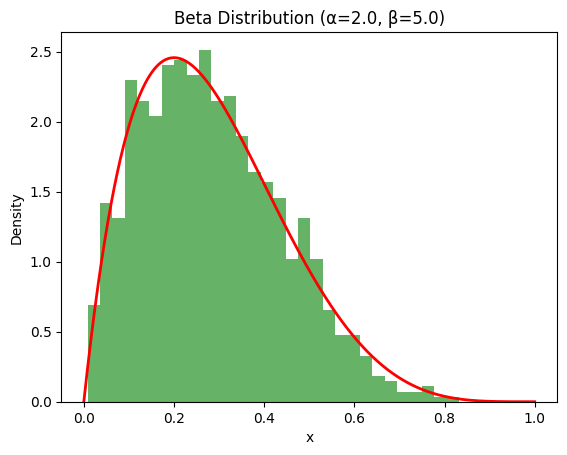

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# ベータ分布のパラメータ
alpha = 2.0
beta_param = 5.0

# ベータ分布から1000個の乱数を生成
samples = np.random.beta(alpha, beta_param, 1000)

# ヒストグラムをプロット
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# 理論的なPDFをプロット
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha, beta_param), 'r-', lw=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Beta Distribution (α={}, β={})'.format(alpha, beta_param))
plt.show()


## ベータ分布のモーメント母関数の導出

モーメント母関数 (Moment Generating Function, MGF) は、確率分布のモーメント（期待値、分散など）を求めるための有力なツールです。ある確率変数 $X$ のモーメント母関数は次のように定義されます：

$$
M_X(t) = \mathbb{E}[e^{tX}]
$$

ここでは、ベータ分布のモーメント母関数を導出します。

### ベータ分布の定義

ベータ分布 $X \sim \text{Beta}(\alpha, \beta)$ の確率密度関数 (PDF) は次のように定義されます：

$$
f(x; \alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} \quad \text{for} \quad 0 \leq x \leq 1
$$

ここで、$B(\alpha, \beta)$ はベータ関数であり、次のように定義されます：

$$
B(\alpha, \beta) = \int_{0}^{1} t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

### モーメント母関数の導出

ベータ分布のモーメント母関数を導出するために、次の積分を計算します：

$$
M_X(t) = \mathbb{E}[e^{tX}] = \int_{0}^{1} e^{tx} f(x; \alpha, \beta) \, dx
$$

1. **定義に基づく計算**：

   ベータ分布の確率密度関数を代入します：

   $$
   M_X(t) = \int_{0}^{1} e^{tx} \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)} \, dx
   $$

2. **積分を計算する**：

   ベータ関数の定義を利用して積分を簡略化します。この積分は通常の方法では難しいため、特殊関数を使った方法を用います。ここで、ベータ関数の性質と関係を利用します：

   $$ 
   M_X(t) = \frac{1}{B(\alpha, \beta)} \int_{0}^{1} e^{tx} x^{\alpha - 1} (1 - x)^{\beta - 1} \, dx 
   $$

   この積分は、次の形を持つ一般化されたベータ関数の積分に対応します：

   $$ 
   \int_{0}^{1} x^{\alpha - 1} (1 - x)^{\beta - 1} e^{tx} \, dx = \frac{1}{B(\alpha, \beta)} \sum_{n=0}^{\infty} \frac{t^n}{n!} B(\alpha + n, \beta)
   $$

   この公式を用いると、

   $$ 
   M_X(t) = \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{B(\alpha + n, \beta)}{B(\alpha, \beta)} 
   $$

3. **ベータ関数の性質を利用する**：

   ベータ関数の性質 $B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}$ を用います：

   $$ 
   M_X(t) = \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{\Gamma(\alpha + n) \Gamma(\beta)}{\Gamma(\alpha + \beta + n)} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} 
   $$

   さらに、

   $$ 
   M_X(t) = \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{\Gamma(\alpha + n)}{\Gamma(\alpha) \frac{\Gamma(\alpha + \beta + n)}{\Gamma(\beta)}}
   $$

4. **ガンマ関数の性質を利用する**：

   ガンマ関数の性質 $\Gamma(\alpha + n) = (\alpha + n - 1)(\alpha + n - 2) \cdots \alpha \Gamma(\alpha)$ を利用すると、

   $$ 
   \frac{\Gamma(\alpha + n)}{\Gamma(\alpha)} = (\alpha + n - 1)(\alpha + n - 2) \cdots \alpha = \frac{(\alpha)_n}{1}
   $$

   ここで、$(\alpha)_n$ は降階乗を示します。したがって、

   $$ 
   M_X(t) = \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{(\alpha)_n}{(\alpha + \beta)_n} 
   $$

### 結論

ベータ分布のモーメント母関数を求めることは複雑ですが、特殊関数の関係を利用することで、以下のように表現できます：

$$
M_X(t) = \sum_{n=0}^{\infty} \frac{t^n}{n!} \frac{(\alpha)_n}{(\alpha + \beta)_n}
$$

この結果は、ベータ分布のモーメントを計算するための基礎となります。特に、モーメント母関数の導関数を用いることで、さまざまなモーメントを求めることができます。